# Long-term pulsar observations with UTR-2 and GURT

### Pulsars B0031-07, B1133+16, B1508+55, and B1919+21

#### Import libraries

In [17]:
# pip install numpy
# pip install matplotlib
# pip install pandas
# pip install xlrd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Reading measurement data (SNR and DM) from the xlsx file

In [18]:
meas = pd.read_excel('DATA/Pulsars_fluxes.xlsx', sheet_name='Sheet1')

print(meas[['Date','SNR B1133+16 UTR2 full']])
#print(meas)
#print(meas.keys())
#print(meas['Date'][0])

          Date  SNR B1133+16 UTR2 full
0   2017.04.10                   114.5
1   2017.04.11                    94.6
2   2017.04.12                   178.1
3   2017.04.13                   217.6
4   2017.04.14                    62.8
5   2017.04.15                   188.5
6   2017.04.16                   129.6
7   2017.04.17                   182.8
8   2017.05.15                   159.2
9   2017.05.16                   137.9
10  2017.05.17                   143.4
11  2017.05.20                   158.8
12  2017.05.21                   147.2
13  2019.10.15                     NaN
14  2019.10.16                     NaN
15  2019.10.17                     NaN
16  2019.10.18                     NaN
17  2019.10.19                     NaN
18  2019.10.20                     NaN
19  2019.10.28                     NaN
20  2019.10.29                     NaN
21  2019.10.30                     NaN
22  2019.10.31                    94.6
23  2019.11.01                   129.2
24  2019.11.02           

#### Constants

In [19]:
kB = 1.38064852 * pow(10,-23)         # Boltzmann constant, J / K
dt = 14400                            # Integration time, s
AeMAX_UTR2 = 130000                   # Full UTR-2 effective area for zenith direction at 25 MHz, m2
AeMAX_U01N = 14000                    # UTR-2 section 01 effective area for zenith direction at 25 MHz, m2
AeMAX_U09W = 12000                    # UTR-2 section 09 effective area for zenith direction at 25 MHz, m2
AeMAX_GURT = 230                      # GURT subarray effective area for zenith direction at 50 MHz, m2
df_UTR2 = 16.5 * pow(10,6)            # Frequency range of UTR-2 observations, Hz
df_GURT = 40 * pow(10,6)              # Frequency range of GURT observations, Hz
l_UTR2 = 2                            # Polarization coefficient for UTR-2
l_GURT = 1                            # Polarization coefficient for GURT

#### Parameters of pulsars (names, rotation periods, projection of effective area, background brightnes temperatures for UTR-2 at 25 MHz and GURT at 50 MHz)

In [20]:
param = pd.DataFrame({
    'Name': ['В0031-07', 'В1133+16', 'В1508+55', 'В1919+21'],
    'Period':      [0.943, 1.188, 0.740, 1.337],
    'Cosinus':     [0.469, 0.875, 0.985, 0.914],
    'Tbg_UTR2':    [0,     24000, 22000, 42000],
    'Tbg_GURT':    [0,      8000,  8000, 12000],
    'TauToP_UTR2': [0,       0.1,  0.22, 0.06 ],
    'TauToP_GURT': [0,     0.065,  0.16, 0.03 ]})

print('\n Parameters of pulsars: \n\n', param, '\n\n')


 Parameters of pulsars: 

        Name  Period  Cosinus  Tbg_UTR2  Tbg_GURT  TauToP_UTR2  TauToP_GURT
0  В0031-07   0.943    0.469         0         0         0.00        0.000
1  В1133+16   1.188    0.875     24000      8000         0.10        0.065
2  В1508+55   0.740    0.985     22000      8000         0.22        0.160
3  В1919+21   1.337    0.914     42000     12000         0.06        0.030 




#### Calculations of fluxes
The common formula for pulsar immediate flux calculations:
$$
S_{\text{pulse}} = \frac{SNR \cdot l \cdot k_B\ \cdot T_{\text{sky}}}{A_{\text{eff}}\ \sqrt{\Delta t \cdot \Delta f \cdot (\tau / P)}} 
$$

$SNR$ is signal-to-noise ratio obtained during observations 
<br>
$l$ is polarization coefficient (2 for UTR-2 and 1 for GURT)
<br>
$k_B$ is Boltzmann constant
<br>
$T_{\text{sky}}$ is sky background temperature, K
<br>
$A_{\text{eff}}$ is radio telescope effective area to the pulsar direction. We obtain the area as a product of maximal effective area of the telescope and cosinus of the zenith angle: $A_{\text{eff}} = A_{\text{eff max}} \cdot \cos (z)$. We calculate the zenith angle as declination minus 50 deg (our lattitude) and minus 5 degrees to make an average step from culmination time.
<br>
$\Delta t$ is integration time, s
<br>
$\Delta f$ is integration frequency range, Hz
<br>
$\tau$ is duration of pulsar pulse, s
<br>
$P$ is pulsar period, s
<br>
<br>
For calculations we use averaged singnal in the frequency ranges of the radio telescopes (16.5 - 33.0 MHz for UTR-2 and 30 - 70 MHz for GURT). The parameters  $T_{\text{sky}}$ and $A_{\text{eff max}}$ are taken for the central frequencies of the ranges, e.g. 24.5 MHz for UTR-2 and 50 MHz for GURT. In fact they are not linear, so this rough assumption affects the accuracy of the calculations.
<br>
It is commonly accepted to show the averaged pulsar flux density, i.e. if the energy of the pulsar was emitted instantaneously, not in pulses. To show averaged flux density we have to spread the energy of the pulse to the whole pulsar period. So we multiply the pulse flux density by $(\tau / P)$ - which value is always less then one.
$$
S_{\text{average}} = S_{\text{pulse}} \cdot (\tau / P) =  \frac{SNR \cdot (\tau / P) \cdot l \cdot k_B\ \cdot T_{\text{sky}}}{A_{\text{eff}}\ \sqrt{\Delta t \cdot \Delta f \cdot (\tau / P)}} 
$$

The $SNR$ shown in the figure of the averaged pulse is obtained for the particular time resolution of the observations. We can increase the $SNR$ by decreasing  time resolution to the pulse duration (if the duration of the equivalent rectangular pulse is less then a half of a period). We call it optimal time resolution. As its value is equal to the duration of equivalent rectangular pulse $\tau$, we will denote it $\tau$ as well.
In order to obtain the $SNR$ for optimal time resolution we need to multiply the averaged flux density by the radiometric gain that accounts for increased (optimal) time resolution

$$
SNR_{\text{opt}} = SNR \sqrt{\frac{\tau}{dt}}
$$
$dt$ is initial time resulution of the signal during observations
<br>
<br>
So the real averaged flux density for optimal resolution can be calculated as:

$$
S_{\text{real}} = \frac {SNR \cdot (\tau / P) \cdot \sqrt{\frac{\tau}{dt}} \cdot l \cdot k_B \cdot T_{\text{sky}}} {A_{\text{eff}} \sqrt {\Delta t \cdot \Delta f \cdot (\tau / P)}} = \frac{SNR \cdot (\tau / P) \cdot l \cdot k_B \cdot T_{\text{sky}}}{A_{\text{eff}} \sqrt{\Delta t \cdot \Delta f \cdot (\tau / P)} \frac {1}{\sqrt{\tau / dt}}} = 
\frac {SNR \cdot (\tau / P) \cdot l \cdot k_B \cdot T_{\text{sky}}}{A_{\text{eff}} \sqrt{\Delta t \cdot \Delta f \cdot (dt / P)}}
$$

In [21]:
pulsar_fluxes = pd.DataFrame({
   
'Date': meas['Date'], 
'B1133+16 flux UTR2 full':    meas['SNR B1133+16 UTR2 full']    * param['TauToP_UTR2'][1] * l_UTR2 * kB * param['Tbg_UTR2'][1] / (AeMAX_UTR2 * param['Cosinus'][1] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][1])),
'B1133+16 flux UTR2 sect 01': meas['SNR B1133+16 UTR2 sect 01'] * param['TauToP_UTR2'][1] * l_UTR2 * kB * param['Tbg_UTR2'][1] / (AeMAX_U01N * param['Cosinus'][1] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][1])),
'B1133+16 flux UTR2 sect 09': meas['SNR B1133+16 UTR2 sect 09'] * param['TauToP_UTR2'][1] * l_UTR2 * kB * param['Tbg_UTR2'][1] / (AeMAX_U09W * param['Cosinus'][1] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][1])),
'B1133+16 flux GURT':         meas['SNR B1133+16 GURT']         * param['TauToP_GURT'][1] * l_GURT * kB * param['Tbg_GURT'][1] / (AeMAX_GURT * param['Cosinus'][1] * np.sqrt(dt * df_GURT * meas['temp resolution GURT'] * pow(10,-3) / param['Period'][1])),

'B1508+55 flux UTR2 full':    meas['SNR B1508+55 UTR2 full']    * param['TauToP_UTR2'][2] * l_UTR2 * kB * param['Tbg_UTR2'][2] / (AeMAX_UTR2 * param['Cosinus'][2] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][2])),
'B1508+55 flux UTR2 sect 01': meas['SNR B1508+55 UTR2 sect 01'] * param['TauToP_UTR2'][2] * l_UTR2 * kB * param['Tbg_UTR2'][2] / (AeMAX_U01N * param['Cosinus'][2] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][2])),
'B1508+55 flux UTR2 sect 09': meas['SNR B1508+55 UTR2 sect 09'] * param['TauToP_UTR2'][2] * l_UTR2 * kB * param['Tbg_UTR2'][2] / (AeMAX_U09W * param['Cosinus'][2] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][2])),
'B1508+55 flux GURT':         meas['SNR B1508+55 GURT']         * param['TauToP_GURT'][2] * l_GURT * kB * param['Tbg_GURT'][2] / (AeMAX_GURT * param['Cosinus'][2] * np.sqrt(dt * df_GURT * meas['temp resolution GURT'] * pow(10,-3) / param['Period'][2])),

'B1919+21 flux UTR2 full':    meas['SNR B1919+21 UTR2 full']    * param['TauToP_UTR2'][3] * l_UTR2 * kB * param['Tbg_UTR2'][3] / (AeMAX_UTR2 * param['Cosinus'][3] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][3])),
'B1919+21 flux UTR2 sect 01': meas['SNR B1919+21 UTR2 sect 01'] * param['TauToP_UTR2'][3] * l_UTR2 * kB * param['Tbg_UTR2'][3] / (AeMAX_U01N * param['Cosinus'][3] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][3])),
'B1919+21 flux UTR2 sect 09': meas['SNR B1919+21 UTR2 sect 09'] * param['TauToP_UTR2'][3] * l_UTR2 * kB * param['Tbg_UTR2'][3] / (AeMAX_U09W * param['Cosinus'][3] * np.sqrt(dt * df_UTR2 * meas['temp resolution UTR2'] * pow(10,-3) / param['Period'][3])),
'B1919+21 flux GURT':         meas['SNR B1919+21 GURT']         * param['TauToP_GURT'][3] * l_GURT * kB * param['Tbg_GURT'][3] / (AeMAX_GURT * param['Cosinus'][3] * np.sqrt(dt * df_GURT * meas['temp resolution GURT'] * pow(10,-3) / param['Period'][3]))

})


#### Making plots

[-1, 27, 0.001, 10]

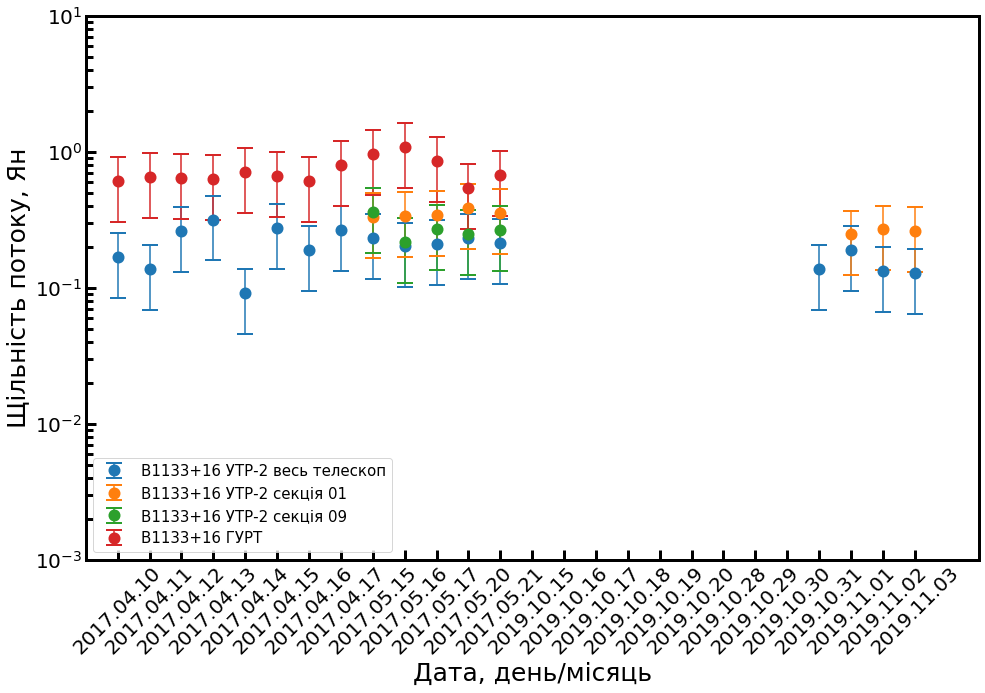

In [22]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')

plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1133+16 flux UTR2 full']   *pow(10,26), yerr=pulsar_fluxes['B1133+16 flux UTR2 full']*pow(10,26)*0.5, label = 'B1133+16 УТР-2 весь телескоп', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1133+16 flux UTR2 sect 01']*pow(10,26), yerr=pulsar_fluxes['B1133+16 flux UTR2 sect 01']*pow(10,26)*0.5, label = 'B1133+16 УТР-2 секція 01', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1133+16 flux UTR2 sect 09']*pow(10,26), yerr=pulsar_fluxes['B1133+16 flux UTR2 sect 09']*pow(10,26)*0.5, label = 'B1133+16 УТР-2 секція 09', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1133+16 flux GURT']        *pow(10,26), yerr=pulsar_fluxes['B1133+16 flux GURT']*pow(10,26)*0.5, label = 'B1133+16 ГУРТ', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Дата, день/місяць', fontsize=25)
plt.ylabel('Щільність потоку, Ян', fontsize=25)
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', fontsize = 15)
plt.axis([-1, len(pulsar_fluxes.index)+1, 0.001, 10])





[-1, 27, 0.001, 10]

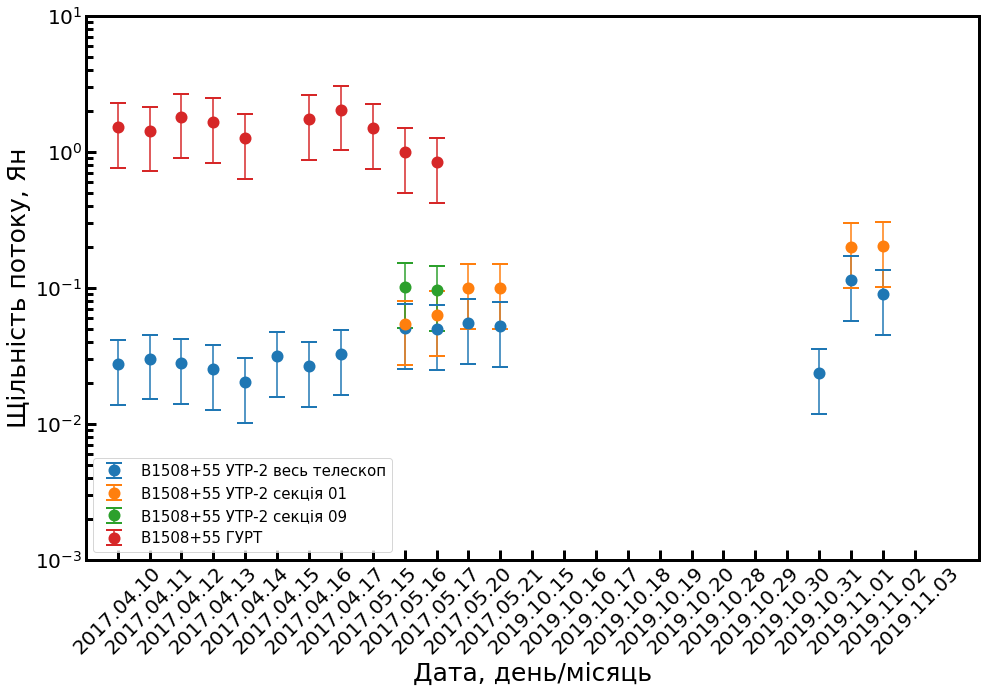

In [24]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')

plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1508+55 flux UTR2 full']   *pow(10,26), yerr=pulsar_fluxes['B1508+55 flux UTR2 full']   *pow(10,26)*0.5, label = 'B1508+55 УТР-2 весь телескоп', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1508+55 flux UTR2 sect 01']*pow(10,26), yerr=pulsar_fluxes['B1508+55 flux UTR2 sect 01']*pow(10,26)*0.5, label = 'B1508+55 УТР-2 секція 01',     fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1508+55 flux UTR2 sect 09']*pow(10,26), yerr=pulsar_fluxes['B1508+55 flux UTR2 sect 09']*pow(10,26)*0.5, label = 'B1508+55 УТР-2 секція 09',     fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1508+55 flux GURT']        *pow(10,26), yerr=pulsar_fluxes['B1508+55 flux GURT']        *pow(10,26)*0.5, label = 'B1508+55 ГУРТ',                fmt='o', markersize=10, capsize=8, markeredgewidth = 2)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Дата, день/місяць', fontsize=25)
plt.ylabel('Щільність потоку, Ян', fontsize=25)
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', fontsize = 15)
plt.axis([-1, len(pulsar_fluxes.index)+1, 0.001, 10])

[-1, 27, 0.001, 10]

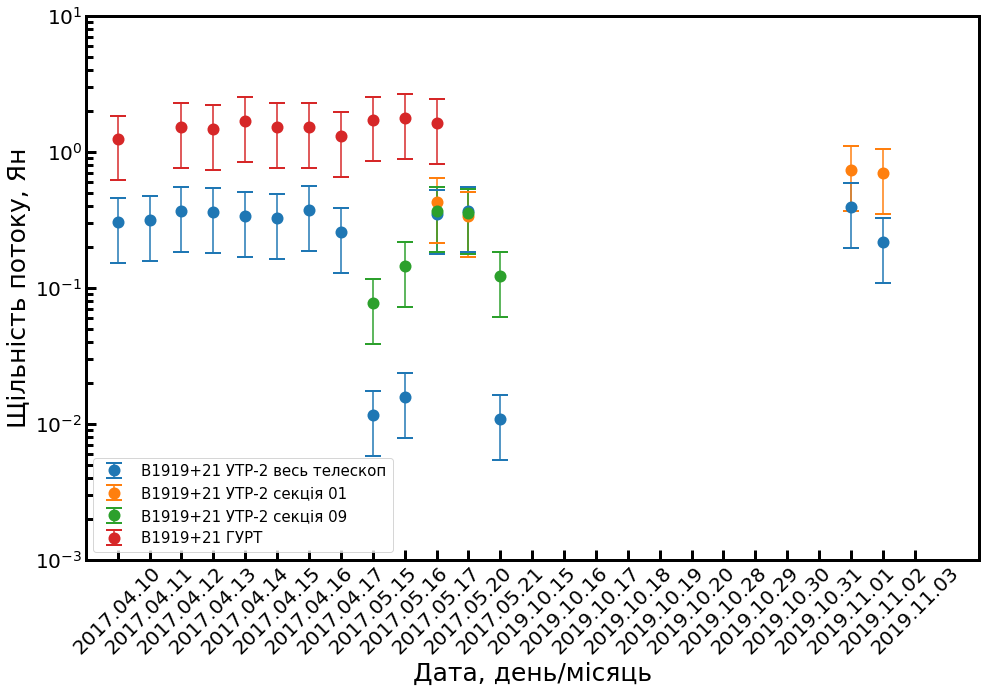

In [25]:
plt.figure(facecolor = 'white', figsize = (16, 10))
ax = plt.subplot(111)
ax.set_yscale("log", nonposy='clip')

plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1919+21 flux UTR2 full']   *pow(10,26), yerr=pulsar_fluxes['B1919+21 flux UTR2 full']   *pow(10,26)*0.5, label = 'B1919+21 УТР-2 весь телескоп', fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1919+21 flux UTR2 sect 01']*pow(10,26), yerr=pulsar_fluxes['B1919+21 flux UTR2 sect 01']*pow(10,26)*0.5, label = 'B1919+21 УТР-2 секція 01',     fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1919+21 flux UTR2 sect 09']*pow(10,26), yerr=pulsar_fluxes['B1919+21 flux UTR2 sect 09']*pow(10,26)*0.5, label = 'B1919+21 УТР-2 секція 09',     fmt='o', markersize=10, capsize=8, markeredgewidth = 2)
plt.errorbar(pulsar_fluxes['Date'], pulsar_fluxes['B1919+21 flux GURT']        *pow(10,26), yerr=pulsar_fluxes['B1919+21 flux GURT']        *pow(10,26)*0.5, label = 'B1919+21 ГУРТ',                fmt='o', markersize=10, capsize=8, markeredgewidth = 2)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3.0)
ax.xaxis.set_tick_params(width=3, which='both', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='major', direction='in', length=10, labelsize = 20)
ax.yaxis.set_tick_params(width=3, which='minor', direction='in', length=7, labelsize = 20)
plt.xlabel('Дата, день/місяць', fontsize=25)
plt.ylabel('Щільність потоку, Ян', fontsize=25)
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', fontsize = 15)
plt.axis([-1, len(pulsar_fluxes.index)+1, 0.001, 10])
